## Tokenizer Backend

In this notebook, we will inspect some of the underlying steps taken in the tokenization process.


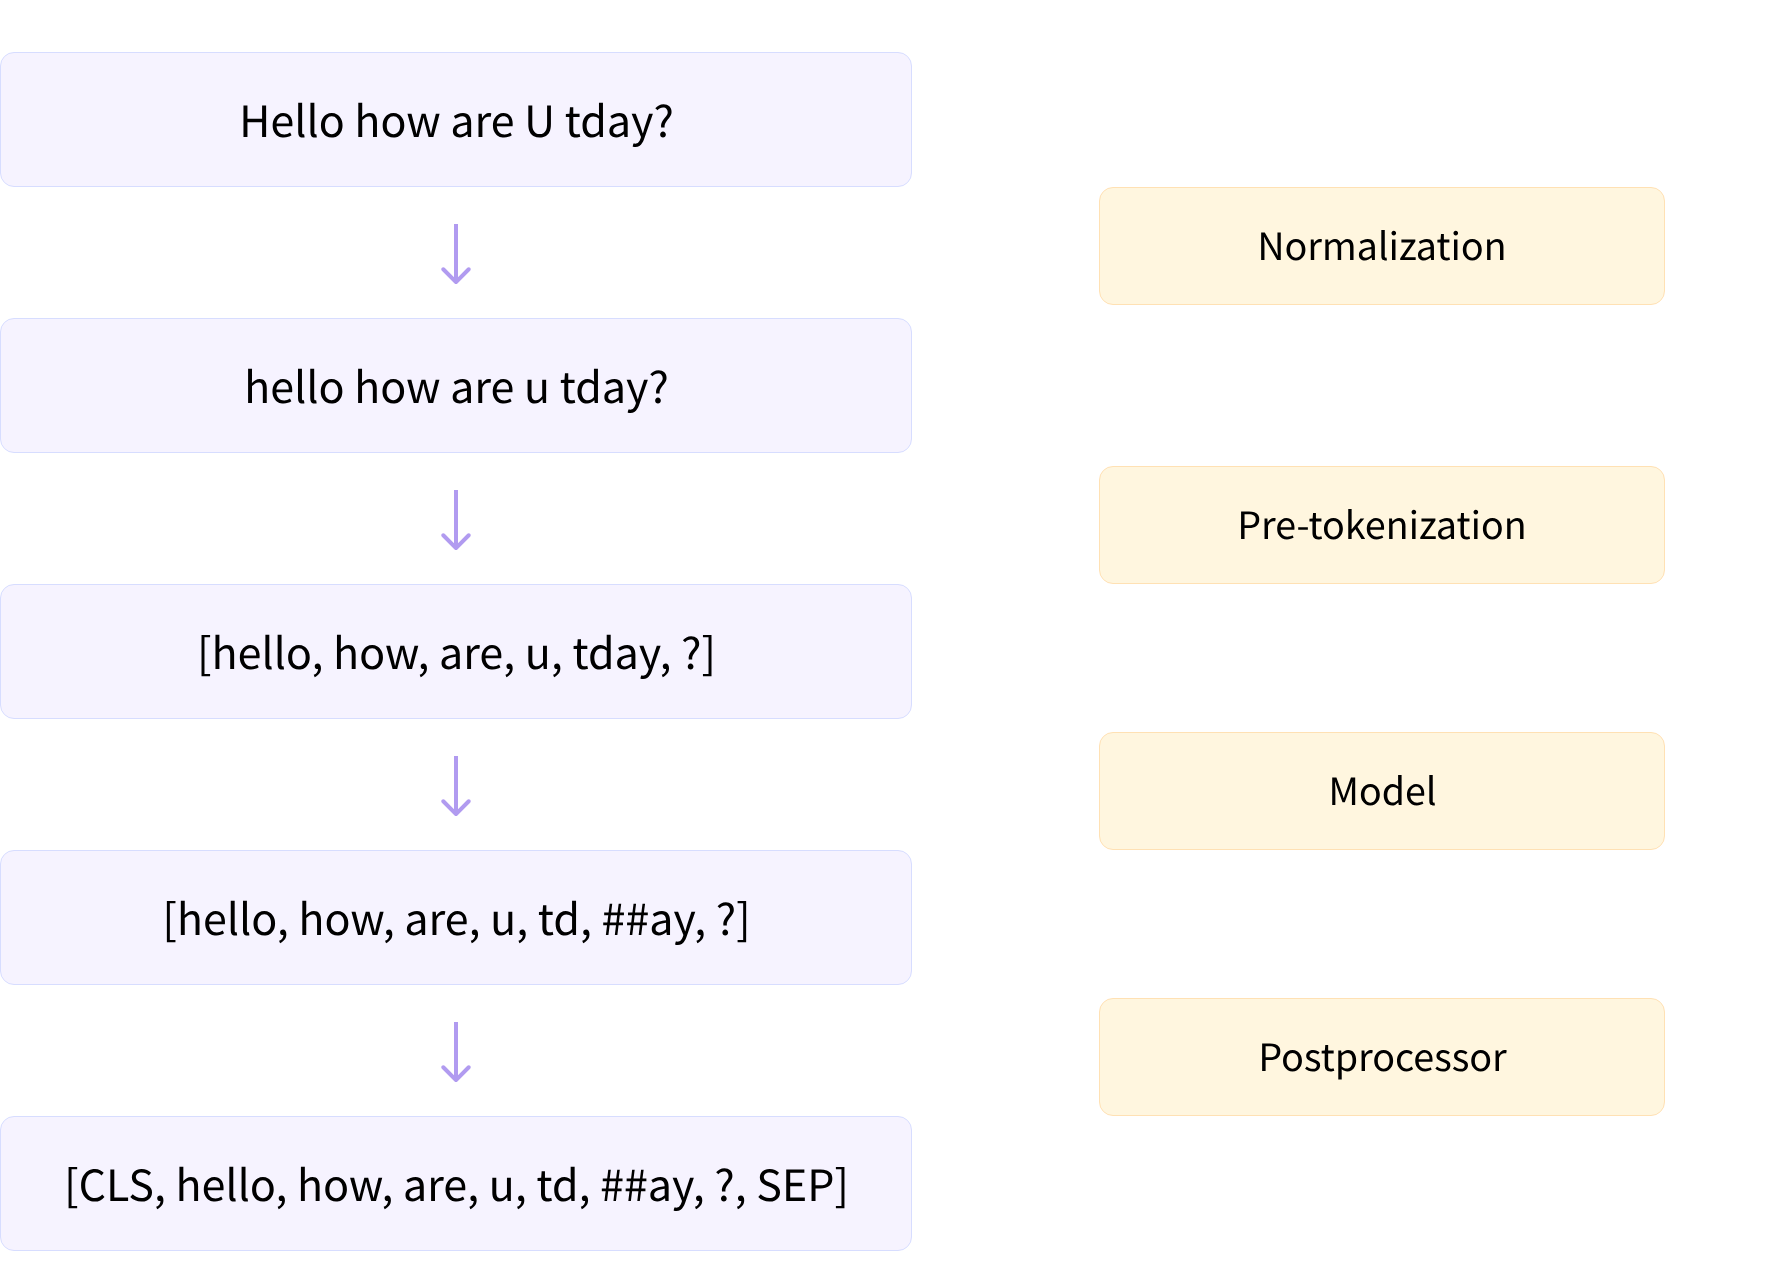

## Normalization


In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
print(type(tokenizer.backend_tokenizer))
print(tokenizer.backend_tokenizer.normalizer.normalize_str("Héllò hôw are ü?"))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

<class 'tokenizers.Tokenizer'>
hello how are u?


Now let us try it with a different tokenizer:

In [3]:
tokenizer_cased = AutoTokenizer.from_pretrained("bert-base-cased")
print(type(tokenizer_cased.backend_tokenizer))
print(tokenizer_cased.backend_tokenizer.normalizer.normalize_str("Héllò hôw are ü?"))

<class 'tokenizers.Tokenizer'>
Héllò hôw are ü?


## Pre-Tokenization

To see how a fast tokenizer performs pre-tokenization, we can use the `pre_tokenize_str()` method of the pre_tokenizer attribute of the tokenizer object:

In [8]:
# Using bert uncased
print(tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?"))

# Using GPT-2
print(AutoTokenizer.from_pretrained("gpt2").backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?"))

# Using T5 which is based on SentencePiece
print(AutoTokenizer.from_pretrained("t5-small").backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?"))

[('Hello', (0, 5)), (',', (5, 6)), ('how', (7, 10)), ('are', (11, 14)), ('you', (16, 19)), ('?', (19, 20))]
[('Hello', (0, 5)), (',', (5, 6)), ('Ġhow', (6, 10)), ('Ġare', (10, 14)), ('Ġ', (14, 15)), ('Ġyou', (15, 19)), ('?', (19, 20))]
[('▁Hello,', (0, 6)), ('▁how', (7, 10)), ('▁are', (11, 14)), ('▁you?', (16, 20))]
